## Avocado

- The avocado (Persea americana), a tree likely originating from southcentral Mexico,is classified as a member of the flowering plant family Lauraceae.


- The fruit of the plant, also called an avocado (or avocado pear or alligator pear), is botanically a large berry containing a single large seed.

## Problem Statement

- This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 


- The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 


- Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 


- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("avacado.csv")

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Column Description

- Date - The date of the observation

- AveragePrice - the average price of a single avocado

- type - conventional or organic

- year - the year

- Region - the city or region of the observation

- Total Volume - Total number of avocados sold

- 4046 - Total number of avocados with PLU 4046 sold

- 4225 - Total number of avocados with PLU 4225 sold

- 4770 - Total number of avocados with PLU 4770 sold

## Problem Type

Conclusions after understanding the data set:-

- 1) The target variable is AveragePrice	

- 2) The target variable is continuous in nature

- 3) Solving it as a Regression Problem

# Checking the data types

In [8]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

## Data types include:

- Object
- Float
- Int

### Lets check for duplicate values

In [9]:
df.duplicated().sum()

0

### No duplicates in the dataset

### Lets check for missing values

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### Luckly no missing values in the dataset

<AxesSubplot:>

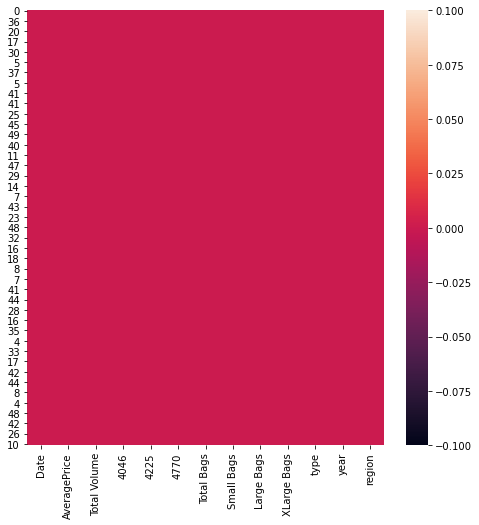

In [11]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### Data Shape

In [12]:
df.shape

(1517, 13)

#### Rown --> 1517

#### Columns --> 13

#### Data Descriptiion

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79
year,1517.0,2.015163e+03,3.693244e-01,2015.00,2015.00,2015.00,2015.00,2016.00


#### Some overview of data:

- 1)The average price for a single Avacado range between 0.49 to 1.68

- 2)The total volume of Avocados sold were between 38750.74 to 44655461.51

- 3)There are three product lookup codes namely 4046,4225,4770 which helps     to identify the freshness, Size, and variety of an individual Avacado 

- 4)Total bags required were in the range 3311 and 6736304 

- 5)There are three categories of bags available Small, Large and Xlarge       Bags

In [14]:
df[df["AveragePrice"] == 1.68]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
7,06-11-2016,1.68,3395058.42,1111431.87,1333386.69,120964.40,829275.46,763934.88,35997.83,29342.75,conventional,2016,California
8,30-10-2016,1.68,3139833.50,1126017.42,1186843.99,92064.47,734907.62,686375.28,25241.60,23290.74,conventional,2016,California


From the above table, we observe that the most expensive average price for an Avacado is 1.68, the fact that both of them belong to the type conventional and come from the California region

In [15]:
df[df["AveragePrice"] == 0.49]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,0.49,1137707.43,738314.8,286858.37,11642.46,100891.8,70749.02,30142.78,0.0,conventional,2015,PhoenixTucson


The cheapest avocados have an average price of 0.49 and they belong to the conventional type, and they come from the PhoenixTucson region

The reason that no Xlarge bags are used can be due to the fact that they don't a level of demand or they have a smaller size 

#### Column names

In [16]:
sns.set_theme(style="darkgrid")

In [17]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

# EDA

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='AveragePrice', ylabel='Count'>

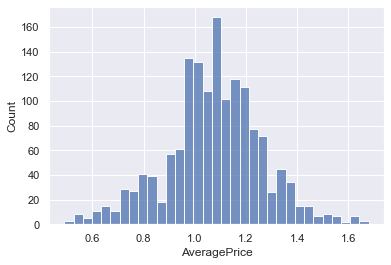

In [19]:
#Univariate Analysis
sns.histplot(x="AveragePrice",data=df)

From the above plot we can observe that most of the Average prices for an avacado are between 1.0 and 1.2

Looks like a normal distribution

<AxesSubplot:xlabel='year', ylabel='count'>

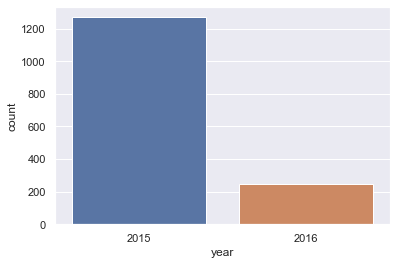

In [20]:
#Univariate Analysis
sns.countplot(x="year",data=df)

Most of the data is from the year 2015

Some data from the year 2016

<AxesSubplot:xlabel='count', ylabel='region'>

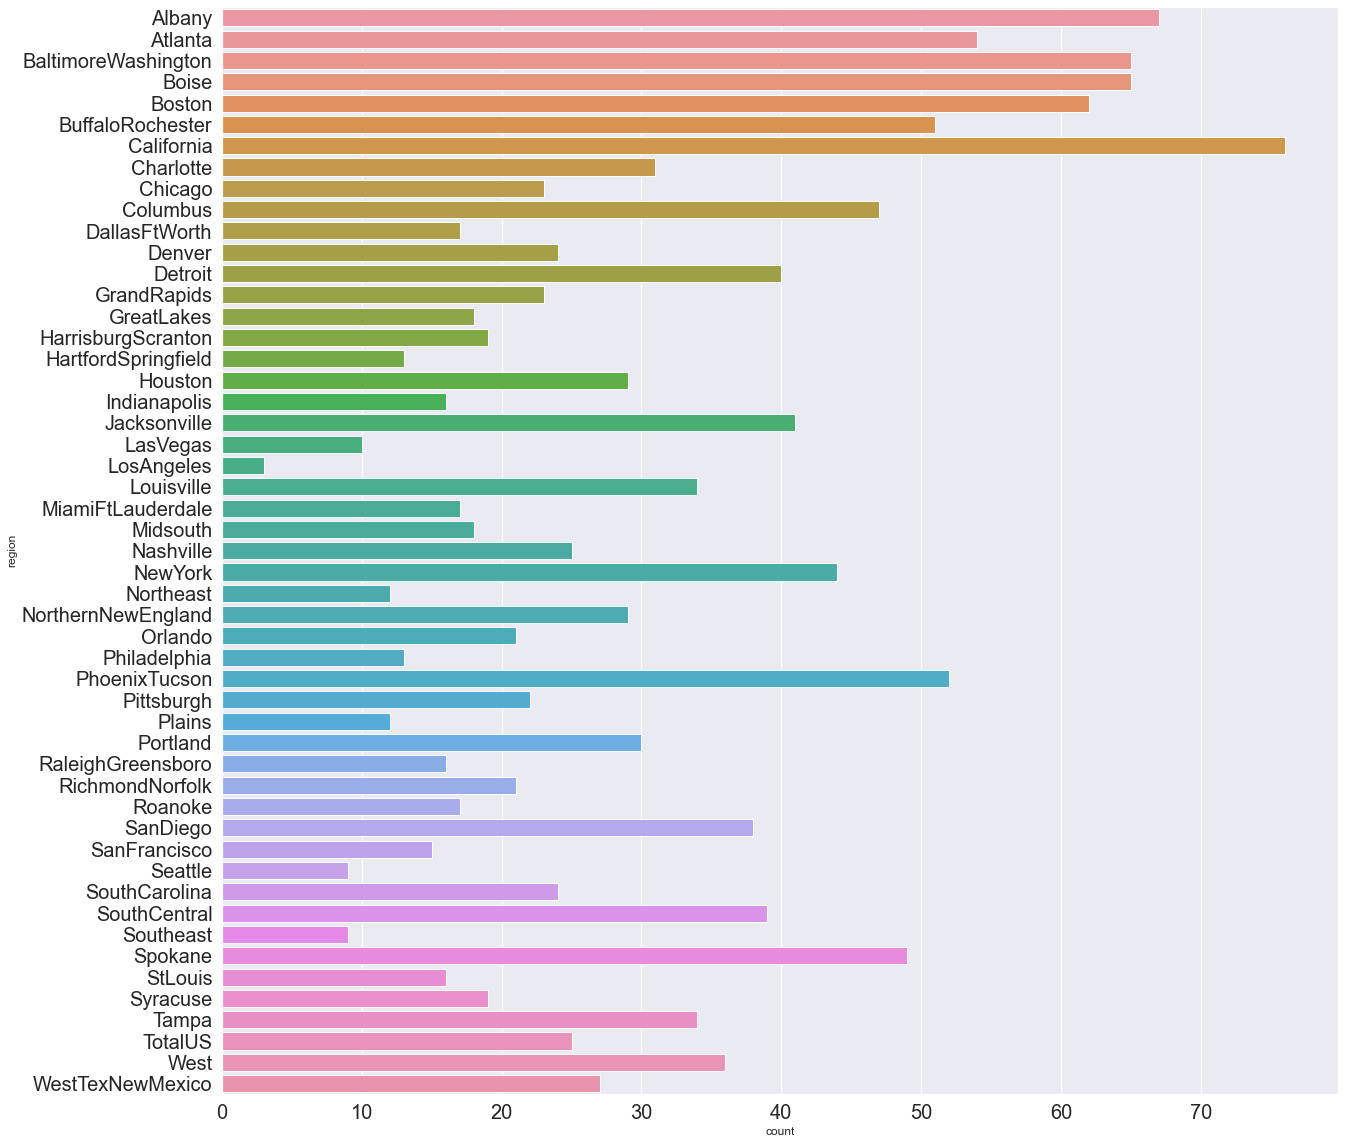

In [21]:
#Univariate Analysis
plt.figure(figsize=(20,20))
plt.rc('ytick',labelsize=20)
plt.rc('xtick',labelsize=20)
sns.countplot(y="region",data=df)

From the above plot, we can state that the highest observations were recorded in the state of California

Even the most expensive average price per Avocados was recorded in California

The state of Los Angeles has the lowest observations recorded

## Using pandas Date Time method for furthur analysis
Lets create 3 more columns 

Date

Month 

Day


In [22]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda a:a.month)
df['Day']=df['Date'].apply(lambda a:a.day)

In [23]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


We added two more columns using the date time function 

8 in month --> august

20 in day --> 20th day of the month

In [24]:
date=df.groupby('Date').mean()

In [25]:
date

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
Date,,,,,,,,,,,,
2015-01-02,0.950833,2.863453e+06,1.239815e+06,1.184574e+06,69865.849583,369198.334167,284210.400833,82855.929167,2132.004167,2015,1,2
2015-01-03,1.044333,1.894995e+06,7.165292e+05,8.139566e+05,61866.595667,302642.549667,250176.751000,48713.552000,3752.246667,2015,1,3
2015-01-11,1.023182,9.349731e+05,3.045712e+05,4.172778e+05,47011.151818,166112.889091,124483.563636,40331.143636,1298.181818,2015,1,11
2015-01-18,1.108571,2.193611e+06,9.342185e+05,8.491908e+05,50529.433810,359672.442857,297050.695714,62052.510952,569.236190,2015,1,18
2015-01-25,1.080455,1.998214e+06,8.598672e+05,7.445960e+05,42420.720909,351330.100455,290110.485000,60767.523182,452.092273,2015,1,25
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-11-20,1.456667,8.460655e+05,2.666160e+05,3.153912e+05,19981.965000,244076.208333,227997.036667,11282.965000,4796.206667,2016,11,20
2016-11-27,1.418333,8.153310e+05,2.632067e+05,2.940521e+05,16464.746667,241607.390000,227233.556667,9311.498333,5062.335000,2016,11,27
2016-12-06,1.197500,2.043106e+06,6.722689e+05,7.197894e+05,106898.940000,544149.022500,506848.872500,28573.552500,8726.597500,2016,12,6


Text(0.5, 1.0, 'Average price distribution per year')

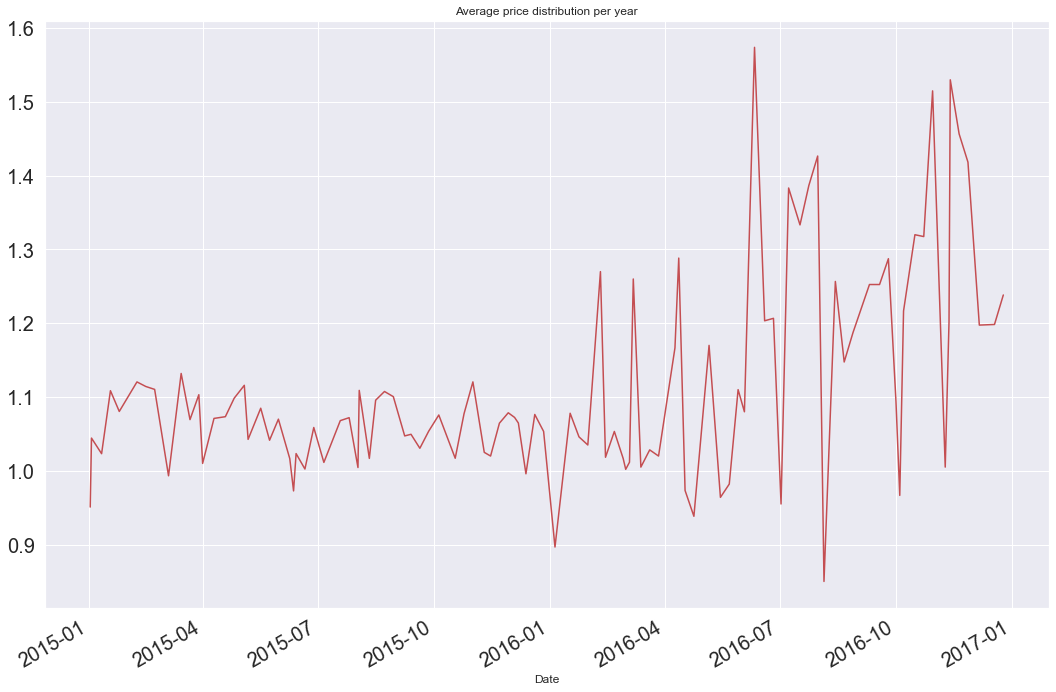

In [26]:
plt.figure(figsize=(18,12))
date['AveragePrice'].plot(color="r")
plt.title("Average price distribution per year")

The following plot is showing the various fluctuations in the average prices of Avacado from January 2015 to January 2017

from the above plot, we can clearly observe that there is a kind of stable trend in Average prices from January 2015 to January 2016 

from January 2016 to 2017 there are some very high increase as well as a decrease in average prices of avocados

### Lets check the Average price distribution per month

Text(0.5, 1.0, 'Average price distribution per month')

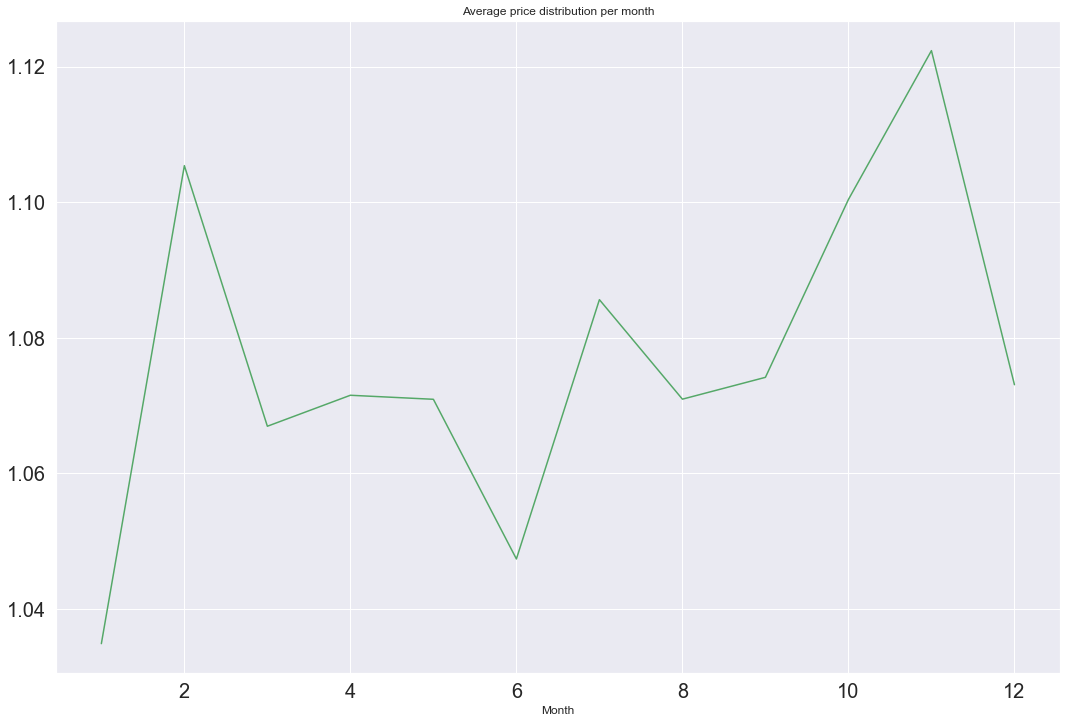

In [27]:
month=df.groupby('Month').mean()
plt.figure(figsize=(18,12))
month['AveragePrice'].plot(color="g")
plt.title("Average price distribution per month")

#### Observations per month

We can clearly see that the average prices of avocados are very high during the months of (October, November, December)

The peak season for Avacados in the USA is from May to August as per research

The graph shows that there is a decline in Average prices in the month of June

The highest average price is recorded in the month (November - December)

### Lets check the Average price distribution per day

Text(0.5, 1.0, 'Average price distribution per Day')

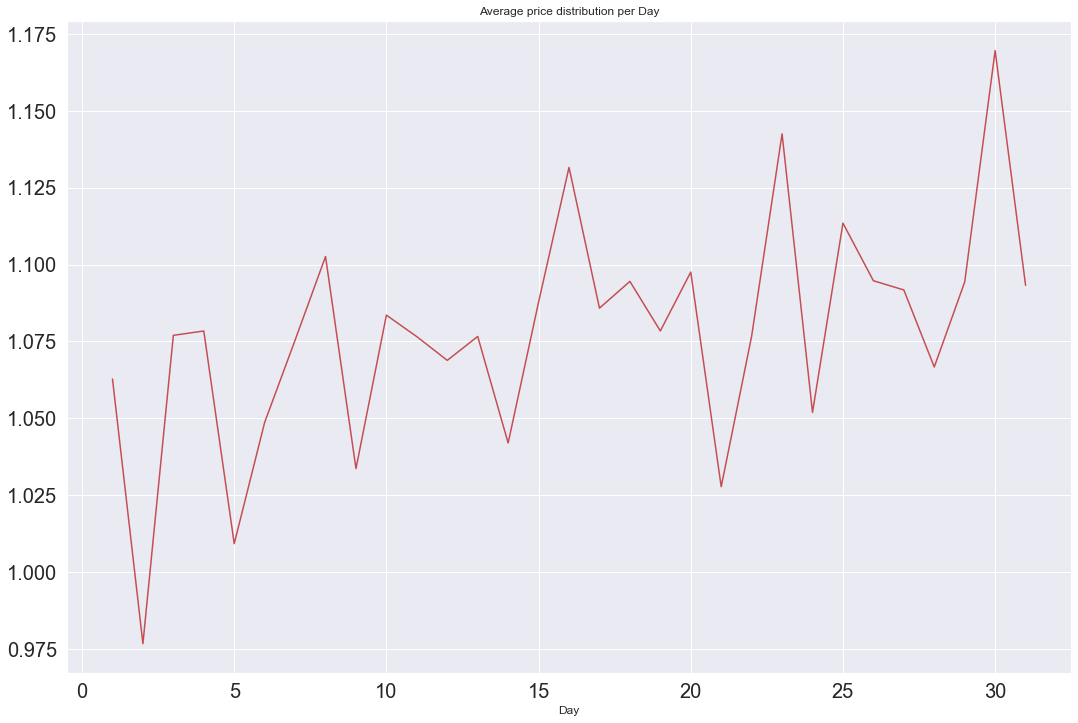

In [28]:
day=df.groupby('Day').mean()
plt.figure(figsize=(18,12))
day['AveragePrice'].plot(color="r")
plt.title("Average price distribution per Day")

We can clearly observe that there is a certain pattern in the data there is a gradual increment of average prices as the month-end approaches

And somehow the prices are at there peak in the last days of the month

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

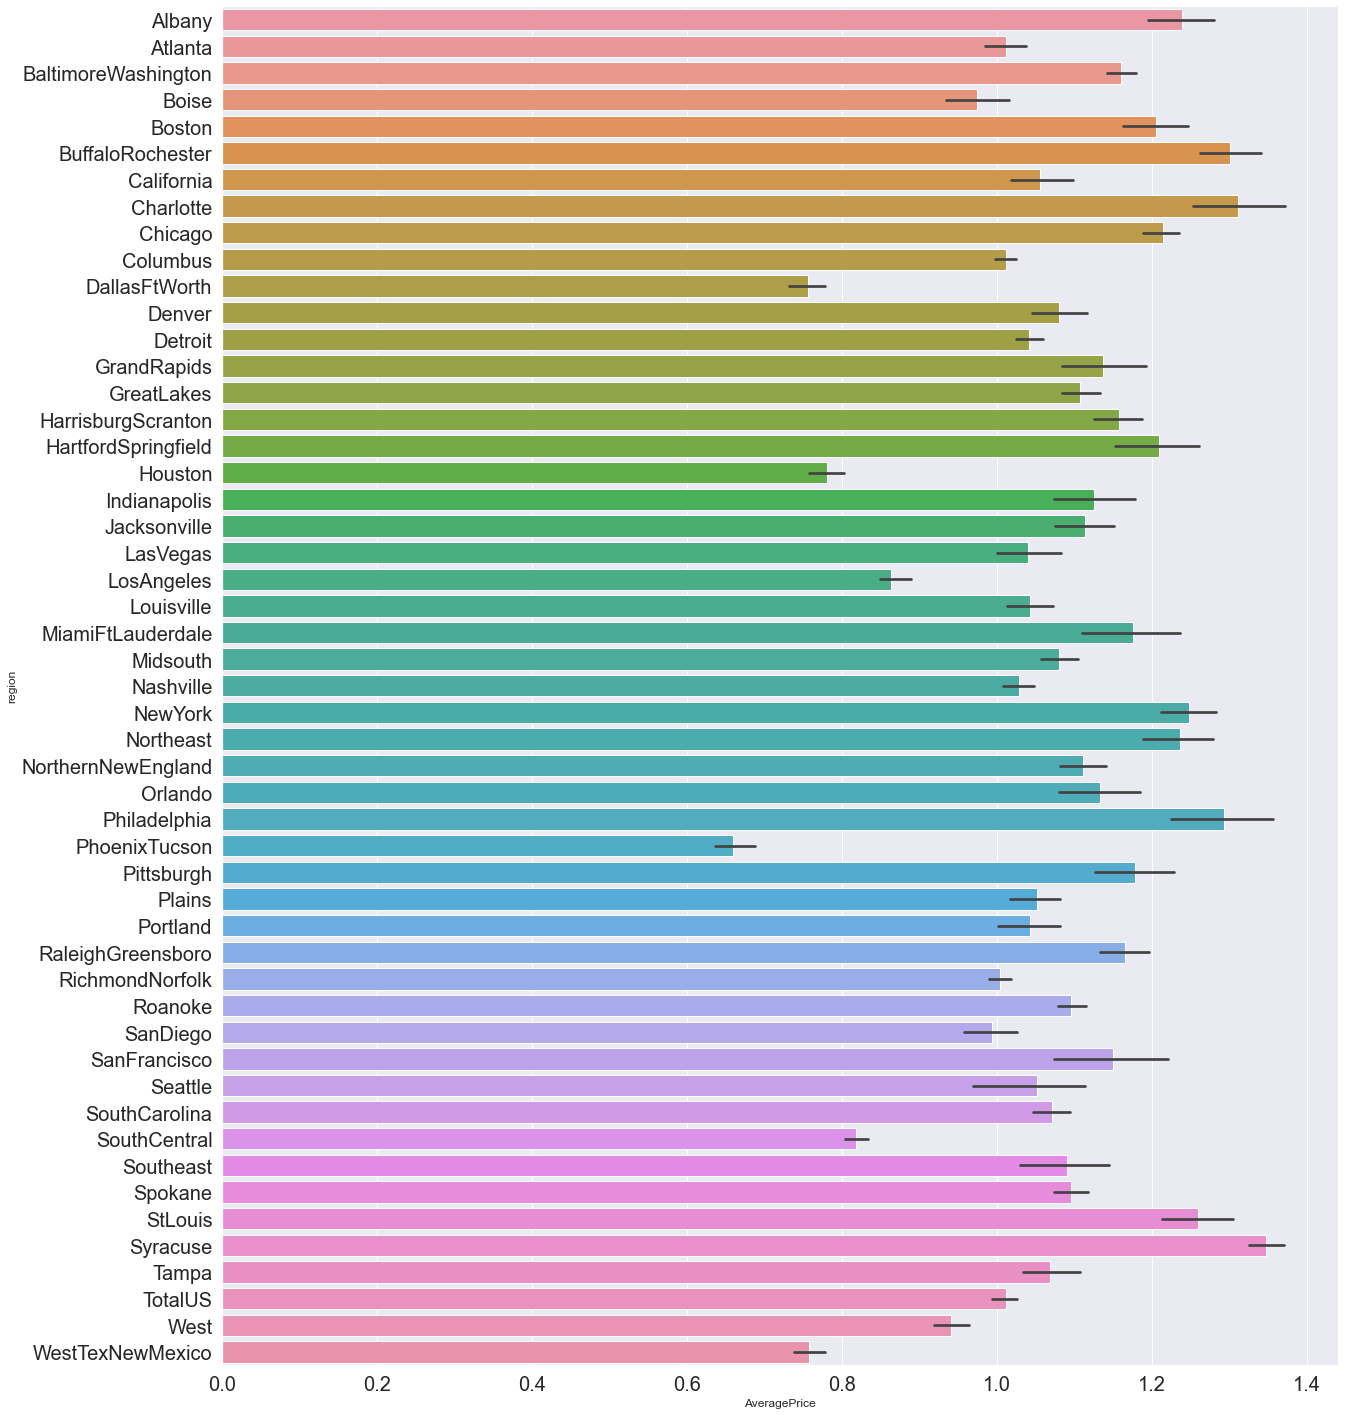

In [29]:
plt.figure(figsize=(20,25))
sns.barplot(x="AveragePrice",y="region",data=df)

From the above plot, we can observe that Buffalo Rochester, Charlotte, Philadelphia, and Syracuse are having high Average prices of avocados 

The lowest average price is recorded in the state of Phoenix Tucson

In [30]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [31]:
df["type"].value_counts()

conventional    1517
Name: type, dtype: int64

The type attribute has only one value which doesnot give any valid information we need to drop it

Also lets drop the Date,type,region

In [32]:
df = df.drop(["Date","type","region"],axis=1)

In [33]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


### Correlation

In [34]:
cor = df.corr()

<AxesSubplot:>

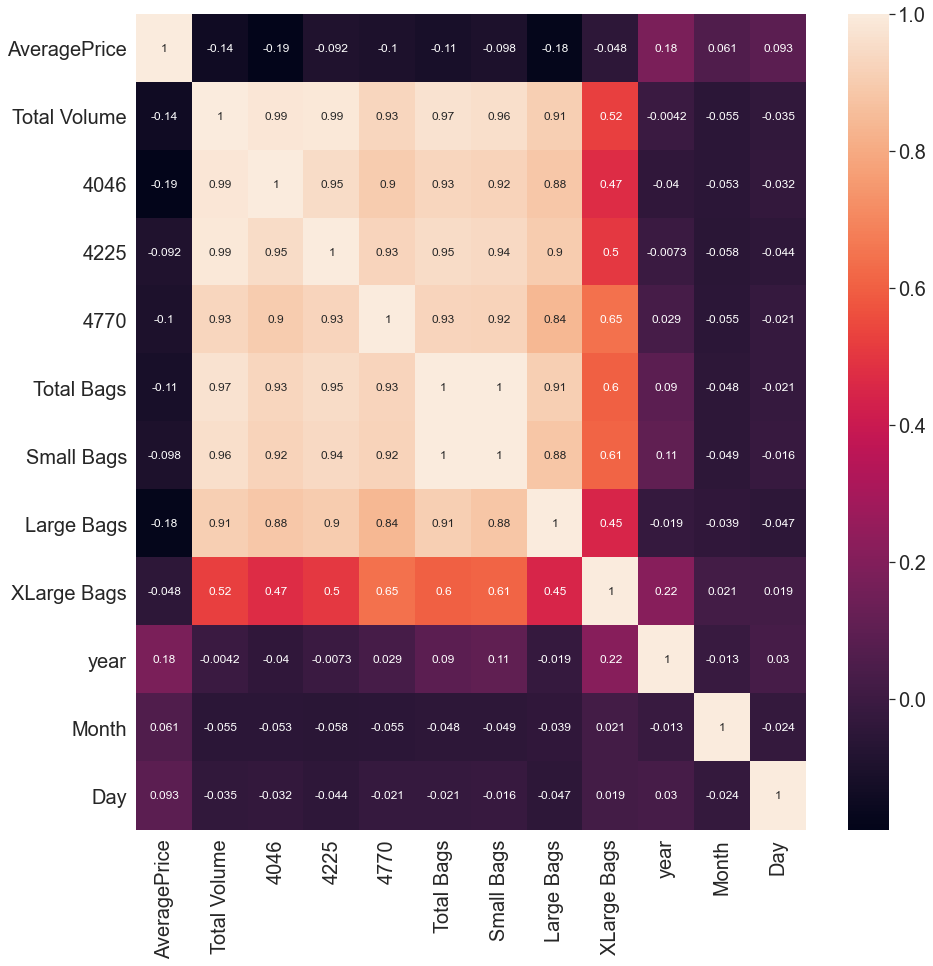

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(data=cor,annot=True)

We can observe that the Year column has the highest correlation with the target variable

There is some correlation with Month and day column

In [36]:
cor["AveragePrice"].sort_values(ascending=False)

AveragePrice    1.000000
year            0.178683
Day             0.092589
Month           0.060642
XLarge Bags    -0.048284
4225           -0.092084
Small Bags     -0.097682
4770           -0.100567
Total Bags     -0.111597
Total Volume   -0.140470
Large Bags     -0.177480
4046           -0.190096
Name: AveragePrice, dtype: float64

The table above shows the highest correlation of all columns with the target variable

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

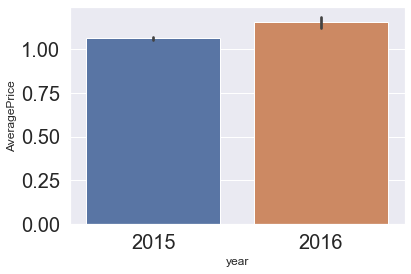

In [37]:
sns.barplot(y="AveragePrice",x="year",data=df)

From the above plot, we can clearly observe that the average rates of avocados increased in 2016 as compared to 2015 

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

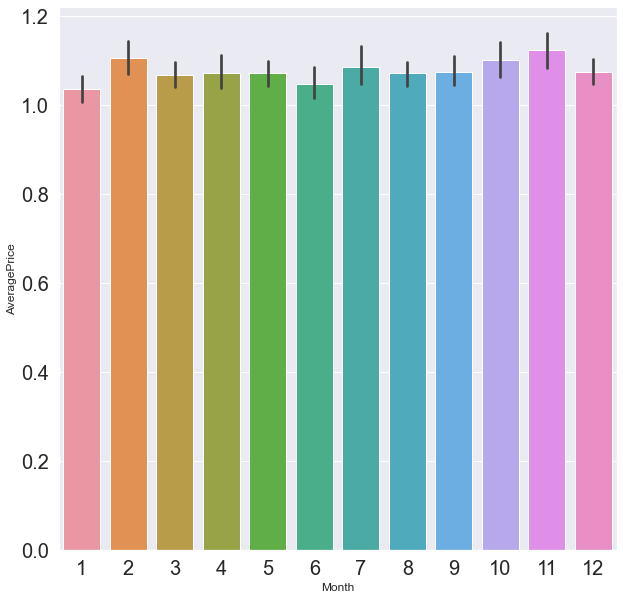

In [38]:
plt.figure(figsize=(10,10))
sns.barplot(y="AveragePrice",x="Month",data=df)

We can clearly observe that the avocado rate are highest in the month of November and the rates are low in January and June

<AxesSubplot:xlabel='Day', ylabel='AveragePrice'>

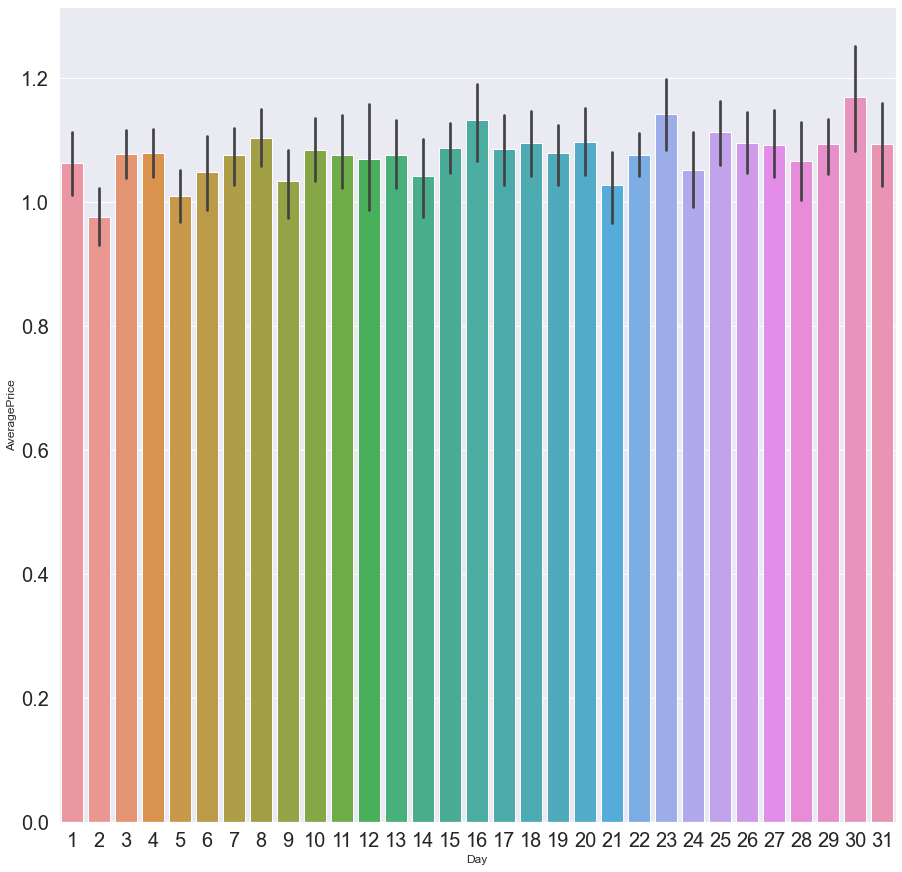

In [39]:
plt.figure(figsize=(15,15))
sns.barplot(y="AveragePrice",x="Day",data=df)

The prices for Avocados are improving as the month-end approaches

In [40]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [41]:
# The year column has only two values
df["year"].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [42]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29


In [43]:
# Droping the Day column
df = df.drop("Day",axis=1)

In [44]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11


# Data Cleaning

In [45]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
year            0
Month           0
dtype: int64

#### No null values

### Outliers

<AxesSubplot:>

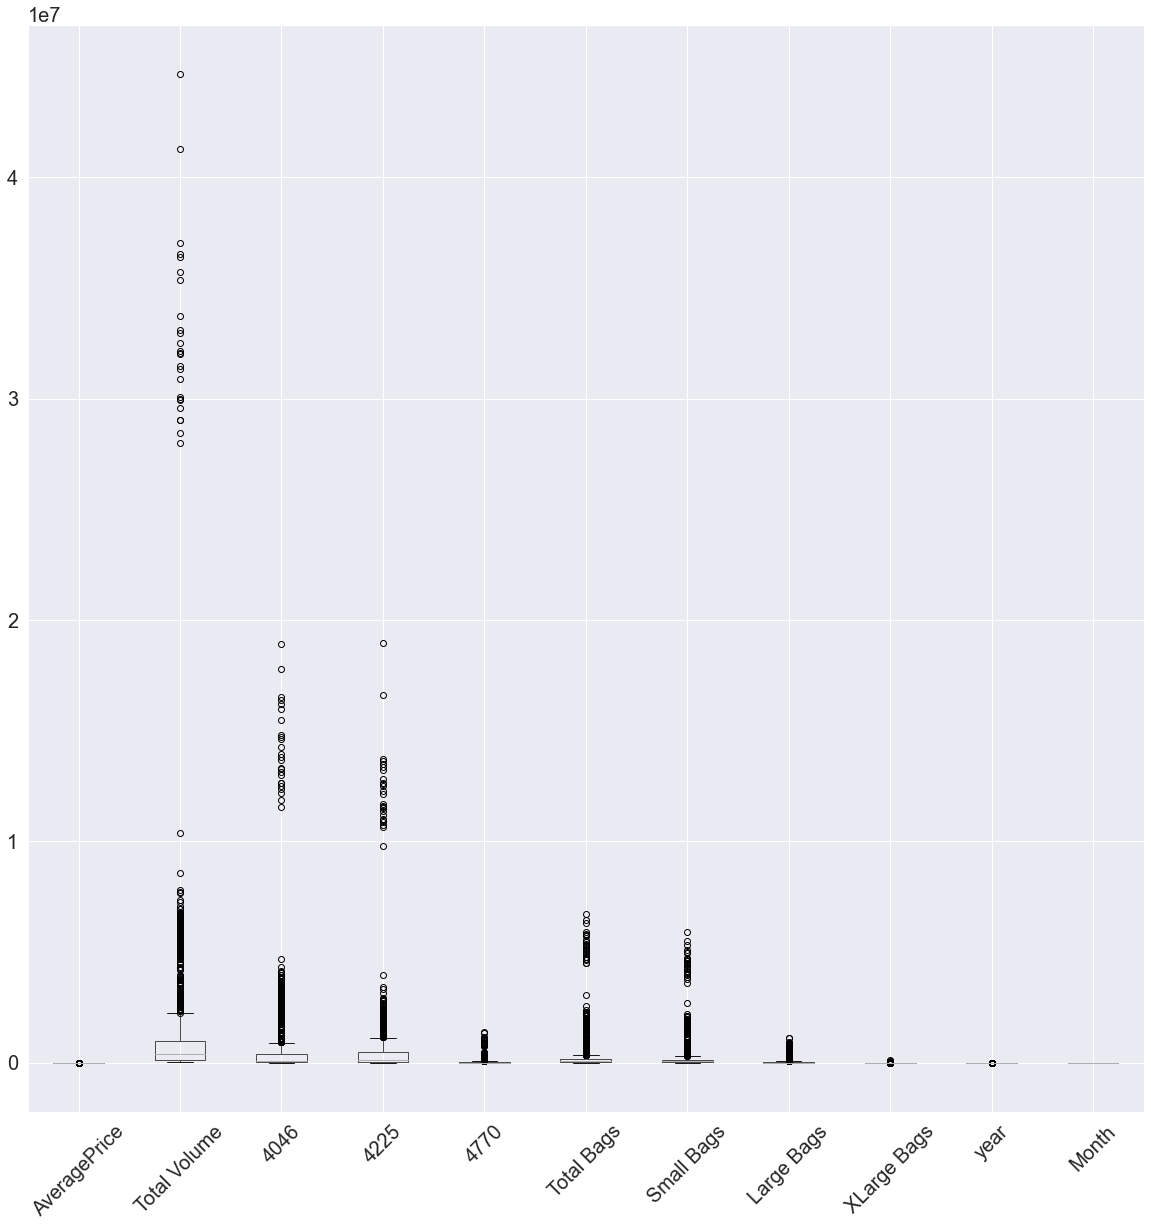

In [46]:
df.boxplot(figsize=(20,20),rot=45)

### As we can observe most of the columns have outliers

In [47]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [48]:
# There are some outliers in the target variable
outliers("AveragePrice")

The first quartile : 0.98 for AveragePrice
The third quartile : 1.19 for AveragePrice
The IQR : 0.20999999999999996 for AveragePrice
The left outlier : 0.665 for AveragePrice
The Right outlier : 1.505 for AveragePrice
Left Outliers : 35
Right Outliers : 26


In [49]:
# There are some outliers in the Total Volume
outliers("Total Volume")

The first quartile : 147469.99 for Total Volume
The third quartile : 981975.08 for Total Volume
The IQR : 834505.09 for Total Volume
The left outlier : -1104287.645 for Total Volume
The Right outlier : 2233732.715 for Total Volume
Left Outliers : 0
Right Outliers : 230


In [50]:
# There are some outliers in the 4046
outliers("4046")

The first quartile : 20400.34 for 4046
The third quartile : 377578.48 for 4046
The IQR : 357178.13999999996 for 4046
The left outlier : -515366.86999999994 for 4046
The Right outlier : 913345.69 for 4046
Left Outliers : 0
Right Outliers : 210


In [51]:
#There are some outliers in the 4225
outliers("4225")

The first quartile : 41476.06 for 4225
The third quartile : 485150.34 for 4225
The IQR : 443674.28 for 4225
The left outlier : -624035.3600000001 for 4225
The Right outlier : 1150661.76 for 4225
Left Outliers : 0
Right Outliers : 226


In [52]:
#There are some outliers in the 4770
outliers("4770")

The first quartile : 911.25 for 4770
The third quartile : 29167.3 for 4770
The IQR : 28256.05 for 4770
The left outlier : -41472.825 for 4770
The Right outlier : 71551.375 for 4770
Left Outliers : 0
Right Outliers : 244


In [53]:
#There are some outliers in the Total Bags
outliers("Total Bags")

The first quartile : 36206.89 for Total Bags
The third quartile : 157609.68 for Total Bags
The IQR : 121402.79 for Total Bags
The left outlier : -145897.29499999998 for Total Bags
The Right outlier : 339713.865 for Total Bags
Left Outliers : 0
Right Outliers : 247


In [54]:
#There are some outliers in the Small Bags
outliers("Small Bags")

The first quartile : 29727.22 for Small Bags
The third quartile : 146199.35 for Small Bags
The IQR : 116472.13 for Small Bags
The left outlier : -144980.975 for Small Bags
The Right outlier : 320907.54500000004 for Small Bags
Left Outliers : 0
Right Outliers : 232


In [55]:
#There are some outliers in the Large Bags
outliers("Large Bags")

The first quartile : 540.74 for Large Bags
The third quartile : 29267.67 for Large Bags
The IQR : 28726.929999999997 for Large Bags
The left outlier : -42549.655 for Large Bags
The Right outlier : 72358.065 for Large Bags
Left Outliers : 0
Right Outliers : 204


In [56]:
#There are some outliers in the XLarge Bags
outliers("XLarge Bags")

The first quartile : 0.0 for XLarge Bags
The third quartile : 401.48 for XLarge Bags
The IQR : 401.48 for XLarge Bags
The left outlier : -602.22 for XLarge Bags
The Right outlier : 1003.7 for XLarge Bags
Left Outliers : 0
Right Outliers : 300


In [57]:
#There are some outliers in the year
outliers("year")

The first quartile : 2015.0 for year
The third quartile : 2015.0 for year
The IQR : 0.0 for year
The left outlier : 2015.0 for year
The Right outlier : 2015.0 for year
Left Outliers : 0
Right Outliers : 247


In [58]:
#no outliers Month
outliers("Month")

The first quartile : 3.0 for Month
The third quartile : 9.0 for Month
The IQR : 6.0 for Month
The left outlier : -6.0 for Month
The Right outlier : 18.0 for Month
Left Outliers : 0
Right Outliers : 0


In [59]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11


## Removing Outliers

#### Z score technique

In [60]:
from scipy.stats import zscore

In [61]:
z = np.abs(zscore(df))

In [62]:
z.shape

(1517, 11)

In [63]:
threshhold = 3
print(np.where(z > 3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [64]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 11)
(1436, 11)


### Percentage data loss 

In [65]:
loss = (1517-1436)/1517*100

In [66]:
print("The data loss is ",loss," %")

The data loss is  5.339485827290705  %


### After removing the outliers there is only 5% data loss 

## Checking Skewness of data

In [67]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
Month           0.111898
dtype: float64

Most of the columns have high skewness we need to reduce it

Except the year column which is categorical in nature

### POWER TRANSFORM

In [68]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11


In [69]:
def logt(col):
    df_new[col] = np.log(df_new[col]+1)
    return df_new[col].skew()

In [70]:
# Skewness has been reduced in Total Volume
logt("Total Volume")

0.4628990979868535

In [71]:
# Skewness has been reduced in 4046
logt("4046")

-0.2702834764192563

In [72]:
# Skewness has been reduced in 4225
logt("4225")

0.01135876200860693

In [73]:
# Skewness has been reduced in 4770
logt("4770")

-0.44971277325187037

In [74]:
# Skewness has been reduced in Total Bags 
logt("Total Bags")

0.37867319033371116

In [75]:
# Skewness has been reduced in Small Bags 
logt("Small Bags")

0.4208563106713245

In [76]:
# Skewness has been reduced in Large Bags 
logt("Large Bags")

-0.9790471629171377

In [77]:
# Skewness has been reduced in XLarge Bags
logt("XLarge Bags")

0.8517401292572954

In [78]:
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,11


###  Most of the skewness has been reduced

In [79]:
df_new.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
Month           0.111898
dtype: float64

### Feature Engineering

In [80]:
df = df_new

In [81]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,6
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,11


In [82]:
df['Month'] = pd.Categorical(df['Month'])
dfDum_month = pd.get_dummies(df['Month'], prefix = 'month',drop_first=True)
dfDum_month.head()

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


In [83]:
df = pd.concat([df, dfDum_month], axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,12,0,0,0,0,0,0,0,0,0,0,1
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,12,0,0,0,0,0,0,0,0,0,0,1
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,12,0,0,0,0,0,0,0,0,0,0,1
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,6,0,0,0,0,1,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,11,0,0,0,0,0,0,0,0,0,1,0


In [84]:
df = df.drop("Month",axis=1)

In [85]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0,0,0,0,0,0,0,0,0,0,1
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0,0,0,0,0,0,0,0,0,0,1
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0,0,0,0,0,0,0,0,0,0,1
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0,0,0,0,1,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0,0,0,0,0,0,0,0,0,1,0


In [86]:
df['year'] = pd.Categorical(df['year'])
dfDum_year = pd.get_dummies(df['year'], prefix = 'Year',drop_first=True)
dfDum_year.head()

,Year_2016
0,0
1,0
2,0
3,0
4,0


In [87]:
df = pd.concat([df, dfDum_year], axis=1)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Year_2016
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,2015,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,2015,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,2015,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,2015,0,0,0,0,1,0,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,2015,0,0,0,0,0,0,0,0,0,1,0,0


In [88]:
df = df.drop("year",axis=1)

In [89]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Year_2016
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
df.shape

(1436, 21)

## Train Test Split

In [91]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Year_2016
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,0,0,0,0,0,0,1,0,0


In [92]:
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

In [93]:
X.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Year_2016
0,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,0,0,0,0,0,0,0,1,0
1,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,0,0,0,0,0,0,0,1,0
2,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,0,0,0,0,0,0,0,1,0
3,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,0,0,0,0,0,0,1,0,0


In [94]:
y.head()

0    1.33
1    1.35
2    0.93
3    1.08
4    1.28
Name: AveragePrice, dtype: float64

In [95]:
X = X.values
y = y.values

In [96]:
X

array([[11.0703443 ,  6.94480055, 10.90514556, ...,  0.        ,
         1.        ,  0.        ],
       [10.91286745,  6.51512742, 10.70638134, ...,  0.        ,
         1.        ,  0.        ],
       [11.68031289,  6.67922223, 11.6004845 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [12.09184975, 10.74431632, 10.87605237, ...,  0.        ,
         0.        ,  1.        ],
       [12.15020321, 10.89880737, 10.88920322, ...,  0.        ,
         0.        ,  1.        ],
       [12.11712831, 10.67168214, 10.90033323, ...,  0.        ,
         0.        ,  1.        ]])

In [97]:
y

array([1.33, 1.35, 0.93, ..., 1.48, 1.47, 1.43])

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [100]:
X_train.shape

(962, 20)

In [101]:
X_test.shape

(474, 20)

In [102]:
y_train.shape

(962,)

In [103]:
y_test.shape

(474,)

### Scaling

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
sc = StandardScaler()

In [106]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [107]:
X_train

array([[-0.99272742, -2.01552738, -0.11685518, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       [-0.68511856, -1.72532306, -0.31509687, ..., -0.2949672 ,
        -0.29704426,  2.30845129],
       [-1.11982958,  0.05769441, -1.77158292, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       ...,
       [ 1.28962355,  0.91494632,  1.31972633, ...,  3.39020744,
        -0.29704426, -0.43319086],
       [ 0.44957563, -1.17701008,  0.88678059, ..., -0.2949672 ,
        -0.29704426,  2.30845129],
       [ 0.10828972,  0.52129432,  0.21771489, ..., -0.2949672 ,
        -0.29704426, -0.43319086]])

In [108]:
X_test

array([[ 0.15386664,  0.67489654,  0.14597907, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       [-0.91083811,  0.18215523, -1.76137591, ...,  3.39020744,
        -0.29704426, -0.43319086],
       [ 1.63935096,  0.96911172,  1.66079929, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       ...,
       [ 1.10351047,  1.23385822,  0.77596946, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       [ 0.0310917 ,  0.66267105, -0.48758575, ..., -0.2949672 ,
        -0.29704426, -0.43319086],
       [ 2.0982788 ,  1.82202987,  1.62833322, ..., -0.2949672 ,
        -0.29704426, -0.43319086]])

### Machine Learning

#### Linear Regression

In [109]:
from sklearn.metrics import r2_score

In [110]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_1 = LinearRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = r2_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")

for random state  0  The training accuracy is : 0.3956373141677726
for random state  0  The testing accuracy is : 0.3901516391864591


for random state  1  The training accuracy is : 0.4041336590701088
for random state  1  The testing accuracy is : 0.36808785269792943


for random state  2  The training accuracy is : 0.39121926455193445
for random state  2  The testing accuracy is : 0.4112502980483512


for random state  3  The training accuracy is : 0.4101821544493677
for random state  3  The testing accuracy is : 0.34231783907066793


for random state  4  The training accuracy is : 0.4139417957614294
for random state  4  The testing accuracy is : 0.3341319569231894


for random state  5  The training accuracy is : 0.3826358621045677
for random state  5  The testing accuracy is : 0.4235557442679374


for random state  6  The training accuracy is : 0.4039152924758096
for random state  6  The testing accuracy is : 0.367194682682792


for random state  7  The training accuracy is : 0.399

for random state  97  The training accuracy is : 0.4165871196387577
for random state  97  The testing accuracy is : 0.31346634786777305


for random state  98  The training accuracy is : 0.3935074804457511
for random state  98  The testing accuracy is : 0.40930149559668894


for random state  99  The training accuracy is : 0.3891391098735859
for random state  99  The testing accuracy is : 0.4188438490610853


for random state  100  The training accuracy is : 0.423342578201648
for random state  100  The testing accuracy is : 0.30523809562759874




In [113]:
# Taking best random state as 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
mod_1 = LinearRegression() 
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = r2_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)
print("\n")

The training accuracy is : 0.3980736580524987
The testing accuracy is : 0.3893877062856883




In [114]:
from sklearn.metrics import mean_squared_error
MSE_1 = mean_squared_error(y_test,pred_1)
print(MSE_1)

0.021785793706775303


In [115]:
# Cross valoidation 

In [116]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [117]:
kfold_accuracy_LR

0.3265553358474208

In [118]:
score = {"Algorithm":["Linear Regression"],
         "Training_Acc":[train_score_1],
        "R2 Score":[test_score_1],
         "MSE":[MSE_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [119]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555


### Random Forest Regression

In [120]:
from sklearn.ensemble import RandomForestRegressor

In [121]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_2 = RandomForestRegressor() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = r2_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.9739190502173953
for random state  0  The testing accuracy is : 0.7959091552649185


for random state  1  The training accuracy is : 0.9743374074978111
for random state  1  The testing accuracy is : 0.7844736377186118


for random state  2  The training accuracy is : 0.9733690191457961
for random state  2  The testing accuracy is : 0.8192849093109786


for random state  3  The training accuracy is : 0.9712057994179645
for random state  3  The testing accuracy is : 0.8365929663433487


for random state  4  The training accuracy is : 0.9739661856023356
for random state  4  The testing accuracy is : 0.8037061354087087


for random state  5  The training accuracy is : 0.9745140512395027
for random state  5  The testing accuracy is : 0.8233976545537751


for random state  6  The training accuracy is : 0.9734760952863388
for random state  6  The testing accuracy is : 0.808303347884322


for random state  7  The training accuracy is : 0.971692

for random state  61  The training accuracy is : 0.9750113100388227
for random state  61  The testing accuracy is : 0.7836141537060373


for random state  62  The training accuracy is : 0.9728783059339112
for random state  62  The testing accuracy is : 0.814409664579151


for random state  63  The training accuracy is : 0.9711497749647021
for random state  63  The testing accuracy is : 0.8352735067112229


for random state  64  The training accuracy is : 0.9724972325460354
for random state  64  The testing accuracy is : 0.784044076689691


for random state  65  The training accuracy is : 0.9726370498199796
for random state  65  The testing accuracy is : 0.814825378354186


for random state  66  The training accuracy is : 0.9736706134286716
for random state  66  The testing accuracy is : 0.7988840299854802


for random state  67  The training accuracy is : 0.9745867880530029
for random state  67  The testing accuracy is : 0.7919873114389001


for random state  68  The training accuracy 

In [122]:
# Taking the best random state as 36
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=42)
mod_2 = RandomForestRegressor() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = r2_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9713290632060049
The testing accuracy is : 0.8283833070543241




In [123]:
MSE_2 = mean_squared_error(y_test,pred_2)
print(MSE_2)

0.006131220434782612


In [124]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [125]:
kfold_accuracy_RFR

0.3692436519464629

In [126]:
score = {"Algorithm":["Linear Regression","Random Forest Regression"],
         "Training_Acc":[train_score_1,train_score_2],
        "R2 Score":[test_score_1,test_score_2],
         "MSE":[MSE_1,MSE_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [127]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244


### Gradient Bosting Regressor

In [128]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
# Using for loop to find the best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_3 = GradientBoostingRegressor() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = r2_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.8506514367674969
for random state  0  The testing accuracy is : 0.7151085576067748


for random state  1  The training accuracy is : 0.8588391007133214
for random state  1  The testing accuracy is : 0.6970830729816128


for random state  2  The training accuracy is : 0.8330157220950641
for random state  2  The testing accuracy is : 0.7487533571396057


for random state  3  The training accuracy is : 0.8394594373110633
for random state  3  The testing accuracy is : 0.7486710262829245


for random state  4  The training accuracy is : 0.8470978752396428
for random state  4  The testing accuracy is : 0.7137747499863851


for random state  5  The training accuracy is : 0.840332326694151
for random state  5  The testing accuracy is : 0.7347829719736985


for random state  6  The training accuracy is : 0.848535480160778
for random state  6  The testing accuracy is : 0.7465928616459933


for random state  7  The training accuracy is : 0.8426122

for random state  61  The training accuracy is : 0.849361340631634
for random state  61  The testing accuracy is : 0.7212288835026837


for random state  62  The training accuracy is : 0.8473169677186188
for random state  62  The testing accuracy is : 0.7298125171724745


for random state  63  The training accuracy is : 0.8338732027428373
for random state  63  The testing accuracy is : 0.7674188714726301


for random state  64  The training accuracy is : 0.8527530437112534
for random state  64  The testing accuracy is : 0.7156363783799884


for random state  65  The training accuracy is : 0.8514570022126379
for random state  65  The testing accuracy is : 0.742445554193061


for random state  66  The training accuracy is : 0.8547524113614535
for random state  66  The testing accuracy is : 0.7142917350408874


for random state  67  The training accuracy is : 0.8391511997276968
for random state  67  The testing accuracy is : 0.7168109983929947


for random state  68  The training accuracy

In [130]:
# using the best random state as 28
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)
mod_3 = GradientBoostingRegressor() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = r2_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.8501008049253818
The testing accuracy is : 0.7557875607428984




In [131]:
MSE_3 = mean_squared_error(y_test,pred_3)
print(MSE_3)

0.008381407568006965


In [132]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [133]:
kfold_accuracy_GB

0.4255936236752893

### ADA Boosting regressor

In [134]:
from sklearn.ensemble import AdaBoostRegressor

In [135]:
# using for loop to get best random state
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_4 = AdaBoostRegressor() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = r2_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.6409967452842307
for random state  0  The testing accuracy is : 0.6498858495266825


for random state  1  The training accuracy is : 0.6653056570476013
for random state  1  The testing accuracy is : 0.5831861257151139


for random state  2  The training accuracy is : 0.6421911015416162
for random state  2  The testing accuracy is : 0.6159917381131222


for random state  3  The training accuracy is : 0.637521151867829
for random state  3  The testing accuracy is : 0.5766127486614389


for random state  4  The training accuracy is : 0.644185945132991
for random state  4  The testing accuracy is : 0.5605289314957335


for random state  5  The training accuracy is : 0.6600693782802126
for random state  5  The testing accuracy is : 0.6217181127341733


for random state  6  The training accuracy is : 0.6499815344687211
for random state  6  The testing accuracy is : 0.6412438869825523


for random state  7  The training accuracy is : 0.6573168

for random state  61  The training accuracy is : 0.6475423266663449
for random state  61  The testing accuracy is : 0.5582353931806543


for random state  62  The training accuracy is : 0.6301572948239982
for random state  62  The testing accuracy is : 0.60026165808524


for random state  63  The training accuracy is : 0.6454397941726058
for random state  63  The testing accuracy is : 0.6551389083016


for random state  64  The training accuracy is : 0.6535617005124441
for random state  64  The testing accuracy is : 0.5929188032661357


for random state  65  The training accuracy is : 0.6597058524276206
for random state  65  The testing accuracy is : 0.6148846460890878


for random state  66  The training accuracy is : 0.6310593603477
for random state  66  The testing accuracy is : 0.56772279952094


for random state  67  The training accuracy is : 0.669884621588875
for random state  67  The testing accuracy is : 0.6223900718007539


for random state  68  The training accuracy is : 0.6

In [136]:
# Taking the best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=2)
mod_4 = AdaBoostRegressor() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = r2_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 0.6426601580121125
The testing accuracy is : 0.63203342324414




In [137]:
MSE_4 = mean_squared_error(y_test,pred_4)
print(MSE_4)

0.013623877101515035


In [138]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [139]:
kfold_accuracy_ADA

0.5080932330149464

In [140]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [141]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244
2,Gredient Boosting,0.850101,0.755788,0.008381,0.425594
3,ADA Boost,0.642660,0.632033,0.013624,0.508093


### KNN Regressor

In [142]:
from sklearn.neighbors import KNeighborsRegressor

In [143]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_5 = KNeighborsRegressor() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = r2_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.8043393566642331
for random state  0  The testing accuracy is : 0.7101362372189581


for random state  1  The training accuracy is : 0.8177978840029823
for random state  1  The testing accuracy is : 0.6804845298169774


for random state  2  The training accuracy is : 0.8058561608994016
for random state  2  The testing accuracy is : 0.7362786901278979


for random state  3  The training accuracy is : 0.8072119939418768
for random state  3  The testing accuracy is : 0.7293047473116783


for random state  4  The training accuracy is : 0.8164816618305859
for random state  4  The testing accuracy is : 0.6773760259615365


for random state  5  The training accuracy is : 0.8059573222745373
for random state  5  The testing accuracy is : 0.7175630646289786


for random state  6  The training accuracy is : 0.8122631435017105
for random state  6  The testing accuracy is : 0.7145833572853297


for random state  7  The training accuracy is : 0.79660

for random state  68  The training accuracy is : 0.8049559951205495
for random state  68  The testing accuracy is : 0.742037167116314


for random state  69  The training accuracy is : 0.8109622821747098
for random state  69  The testing accuracy is : 0.645926318709682


for random state  70  The training accuracy is : 0.8036626266822754
for random state  70  The testing accuracy is : 0.6736697340912186


for random state  71  The training accuracy is : 0.8147964618800201
for random state  71  The testing accuracy is : 0.6929135917647351


for random state  72  The training accuracy is : 0.805021826887739
for random state  72  The testing accuracy is : 0.6278553409778225


for random state  73  The training accuracy is : 0.7923000487699838
for random state  73  The testing accuracy is : 0.7524142174983093


for random state  74  The training accuracy is : 0.8135492162540867
for random state  74  The testing accuracy is : 0.6968883632418532


for random state  75  The training accuracy 

In [144]:
# The best random state is 15
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=15)
mod_5 = KNeighborsRegressor() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = r2_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.7956514093165289
The testing accuracy is : 0.7609606582669943




In [145]:
MSE_5 = mean_squared_error(y_test,pred_5)
print(MSE_5)

0.009421008695652175


In [146]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_KNR = np.mean(abs(K_results))

In [147]:
kfold_accuracy_KNR

0.4874312716920981

In [148]:
    score = {"Algorithm":["Linear Regression","Random Forest Regression",
                         "Gredient Boosting","ADA Boost",
                         "K Neighbor Regressor"],
             "Training_Acc":[train_score_1,train_score_2,train_score_3,
                            train_score_4,train_score_5],
            "R2 Score":[test_score_1,test_score_2,test_score_3,
                       test_score_4,test_score_5],
             "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5],
            "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                               kfold_accuracy_GB,
                               kfold_accuracy_ADA,kfold_accuracy_KNR]}

    final_card = pd.DataFrame(score)

In [149]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244
2,Gredient Boosting,0.850101,0.755788,0.008381,0.425594
3,ADA Boost,0.642660,0.632033,0.013624,0.508093
4,K Neighbor Regressor,0.795651,0.760961,0.009421,0.487431


### Bagging Regressor

In [150]:
from sklearn.ensemble import BaggingRegressor

In [151]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_6 = BaggingRegressor() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = r2_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.9581476385133892
for random state  0  The testing accuracy is : 0.769895998688369


for random state  1  The training accuracy is : 0.96295397894184
for random state  1  The testing accuracy is : 0.7597538239538393


for random state  2  The training accuracy is : 0.9551990234188376
for random state  2  The testing accuracy is : 0.7939554747776938


for random state  3  The training accuracy is : 0.9545506392442855
for random state  3  The testing accuracy is : 0.8020487718317082


for random state  4  The training accuracy is : 0.9595630852516583
for random state  4  The testing accuracy is : 0.7671392013580265


for random state  5  The training accuracy is : 0.9634328598704872
for random state  5  The testing accuracy is : 0.7945812999722773


for random state  6  The training accuracy is : 0.9603965077610108
for random state  6  The testing accuracy is : 0.7788723700013502


for random state  7  The training accuracy is : 0.96177241

for random state  61  The training accuracy is : 0.95825514136812
for random state  61  The testing accuracy is : 0.7459494743023116


for random state  62  The training accuracy is : 0.9646561327944317
for random state  62  The testing accuracy is : 0.8009875736783485


for random state  63  The training accuracy is : 0.9566214283247818
for random state  63  The testing accuracy is : 0.826374372553668


for random state  64  The training accuracy is : 0.9611437424762921
for random state  64  The testing accuracy is : 0.7410851041459279


for random state  65  The training accuracy is : 0.960763036802334
for random state  65  The testing accuracy is : 0.8165463048010265


for random state  66  The training accuracy is : 0.9574535558358576
for random state  66  The testing accuracy is : 0.7758285550009731


for random state  67  The training accuracy is : 0.9625194829783421
for random state  67  The testing accuracy is : 0.789973832700068


for random state  68  The training accuracy is

In [152]:
# The best random state is 11
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=11)
mod_6 = BaggingRegressor() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = r2_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.959510680641926
The testing accuracy is : 0.8207404748113976




In [153]:
MSE_6 = mean_squared_error(y_test,pred_6)
print(MSE_6)

0.006054811594202899


In [154]:
kfold = KFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_BR = np.mean(abs(K_results))

In [155]:
kfold_accuracy_BR

0.4228634328768813

In [156]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR]}

final_card = pd.DataFrame(score)

In [157]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244
2,Gredient Boosting,0.850101,0.755788,0.008381,0.425594
3,ADA Boost,0.642660,0.632033,0.013624,0.508093
4,K Neighbor Regressor,0.795651,0.760961,0.009421,0.487431
5,Bagging Regressor,0.959511,0.820740,0.006055,0.422863


### XG BOOST Regression

In [158]:
import xgboost as xgb

In [159]:
from xgboost.sklearn import XGBRegressor

In [160]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_7 = XGBRegressor() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = r2_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.9988141853878045
for random state  0  The testing accuracy is : 0.7889421566589072


for random state  1  The training accuracy is : 0.9985087161887748
for random state  1  The testing accuracy is : 0.7776744767527166


for random state  2  The training accuracy is : 0.9987636296725044
for random state  2  The testing accuracy is : 0.8116451819861952


for random state  3  The training accuracy is : 0.9989373649266446
for random state  3  The testing accuracy is : 0.8325573017382514


for random state  4  The training accuracy is : 0.9989292219070869
for random state  4  The testing accuracy is : 0.8014945610391998


for random state  5  The training accuracy is : 0.9985999138667538
for random state  5  The testing accuracy is : 0.8044385460981425


for random state  6  The training accuracy is : 0.9990482788724964
for random state  6  The testing accuracy is : 0.8150630423878443


for random state  7  The training accuracy is : 0.99867

for random state  60  The training accuracy is : 0.9987308086379671
for random state  60  The testing accuracy is : 0.758114337002143


for random state  61  The training accuracy is : 0.9988055803531121
for random state  61  The testing accuracy is : 0.7777672484958135


for random state  62  The training accuracy is : 0.9987557992216468
for random state  62  The testing accuracy is : 0.7968395088852118


for random state  63  The training accuracy is : 0.998604458283468
for random state  63  The testing accuracy is : 0.8282547684285243


for random state  64  The training accuracy is : 0.9985660966591853
for random state  64  The testing accuracy is : 0.7611404131153179


for random state  65  The training accuracy is : 0.9987513752460495
for random state  65  The testing accuracy is : 0.7929615496457446


for random state  66  The training accuracy is : 0.9990773112933113
for random state  66  The testing accuracy is : 0.7594652317599581


for random state  67  The training accuracy

In [161]:
# Taking the best random state as 70
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=70)
mod_7 = XGBRegressor() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = r2_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.9989465310453871
The testing accuracy is : 0.8266943645306742




In [162]:
MSE_7 = mean_squared_error(y_test,pred_7)
print(MSE_7)

0.00623153104157563


In [163]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_XGB = np.mean(abs(K_results))

In [164]:
kfold_accuracy_XGB

0.4983998270786622

In [165]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor",
                     "XG Boost"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR,kfold_accuracy_XGB]}

final_card = pd.DataFrame(score)

In [166]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244
2,Gredient Boosting,0.850101,0.755788,0.008381,0.425594
3,ADA Boost,0.642660,0.632033,0.013624,0.508093
4,K Neighbor Regressor,0.795651,0.760961,0.009421,0.487431
5,Bagging Regressor,0.959511,0.820740,0.006055,0.422863
6,XG Boost,0.998947,0.826694,0.006232,0.498400


### SVR

In [167]:
from sklearn.svm import SVR

In [168]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=i)
    mod_8 = SVR() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = r2_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.48458025740461763
for random state  0  The testing accuracy is : 0.47894384703684056


for random state  1  The training accuracy is : 0.4958564908579255
for random state  1  The testing accuracy is : 0.47626213302633247


for random state  2  The training accuracy is : 0.4736088843442495
for random state  2  The testing accuracy is : 0.5064289060261724


for random state  3  The training accuracy is : 0.4904288949952872
for random state  3  The testing accuracy is : 0.48176716144642606


for random state  4  The training accuracy is : 0.5000070619268672
for random state  4  The testing accuracy is : 0.4474479300061983


for random state  5  The training accuracy is : 0.4707548504701068
for random state  5  The testing accuracy is : 0.5152382281229523


for random state  6  The training accuracy is : 0.4837598514150059
for random state  6  The testing accuracy is : 0.4706806046581111


for random state  7  The training accuracy is : 0.4

for random state  62  The training accuracy is : 0.4870079612550873
for random state  62  The testing accuracy is : 0.4831428421816051


for random state  63  The training accuracy is : 0.46932842001555164
for random state  63  The testing accuracy is : 0.5123228440536663


for random state  64  The training accuracy is : 0.4958152501771277
for random state  64  The testing accuracy is : 0.45176723994055457


for random state  65  The training accuracy is : 0.4871774880837668
for random state  65  The testing accuracy is : 0.4796349365421201


for random state  66  The training accuracy is : 0.49805257276878934
for random state  66  The testing accuracy is : 0.44105919766105484


for random state  67  The training accuracy is : 0.4856422242805817
for random state  67  The testing accuracy is : 0.4867747200708218


for random state  68  The training accuracy is : 0.48814009736836195
for random state  68  The testing accuracy is : 0.4664554652684134


for random state  69  The training a

In [169]:
# Best random state is 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.24, random_state=7)
mod_8 = SVR() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = r2_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.4823696107003158
The testing accuracy is : 0.4663270066773818




In [170]:
MSE_8 = mean_squared_error(y_test,pred_8)
print(MSE_8)

0.019325067371071952


In [171]:
kfold = KFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_SVR = np.mean(abs(K_results))

In [172]:
kfold_accuracy_SVR

0.4047290436869163

In [173]:
score = {"Algorithm":["Linear Regression","Random Forest Regression",
                     "Gredient Boosting","ADA Boost",
                     "K Neighbor Regressor","Bagging Regressor",
                     "XG Boost","Support Vector Regression"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "R2 Score":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7,test_score_8],
         "MSE":[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7,MSE_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_RFR,
                           kfold_accuracy_GB,
                           kfold_accuracy_ADA,kfold_accuracy_KNR,
                           kfold_accuracy_BR,kfold_accuracy_XGB,
                           kfold_accuracy_SVR]}

final_card = pd.DataFrame(score)

In [174]:
final_card

,Algorithm,Training_Acc,R2 Score,MSE,Cross_validation
0,Linear Regression,0.398074,0.389388,0.021786,0.326555
1,Random Forest Regression,0.971329,0.828383,0.006131,0.369244
2,Gredient Boosting,0.850101,0.755788,0.008381,0.425594
3,ADA Boost,0.642660,0.632033,0.013624,0.508093
4,K Neighbor Regressor,0.795651,0.760961,0.009421,0.487431
5,Bagging Regressor,0.959511,0.820740,0.006055,0.422863
6,XG Boost,0.998947,0.826694,0.006232,0.498400
7,Support Vector Regression,0.482370,0.466327,0.019325,0.404729


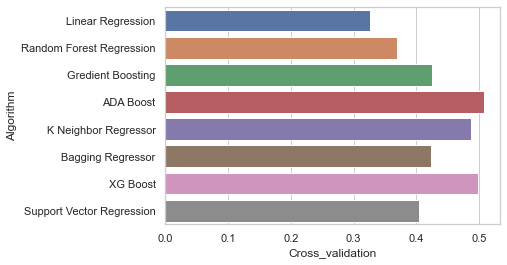

In [175]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### From all the machine learning models AdaBoost is having the best results based upon cross validation scores

In [220]:
co = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'Year_2016']

<AxesSubplot:>

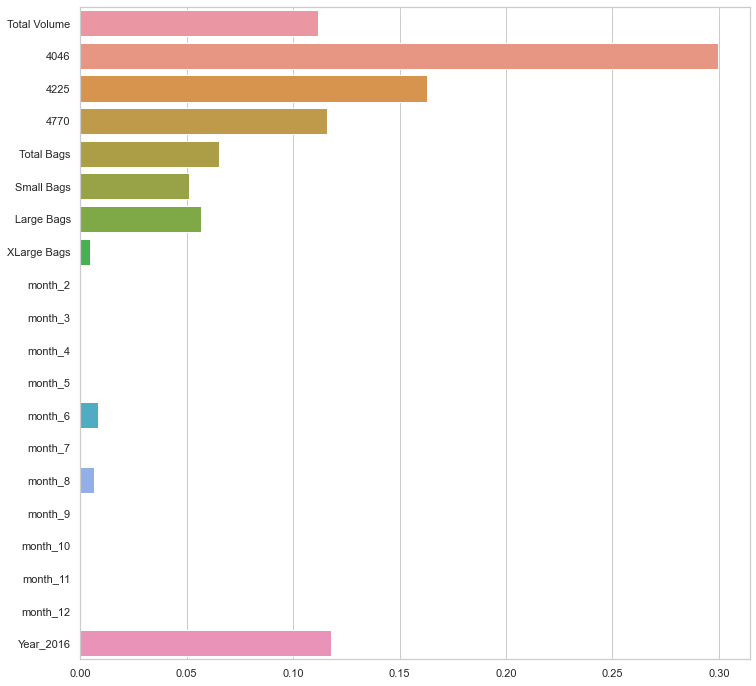

In [223]:
plt.figure(figsize=(12,12))
sns.barplot(y=co,x=mod_4.feature_importances_)

##### So we can clearly observe that  4046 PLU is turning out to be the most useful feature in predicting the Average price of avocados

#### Hyperparametric Tuning

#### Grid Search CV

In [176]:
from sklearn.model_selection import GridSearchCV

In [183]:
n_estimators=[50,100]

learning_rate=[0.01,0.05,0.1,0.3,1]

loss=['linear', 'square', 'exponential']

#### Parameters for ADA Boost

In [184]:
parameters = {
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "loss":loss
}

In [185]:
parameters

{'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
 'loss': ['linear', 'square', 'exponential']}

In [186]:
es = AdaBoostRegressor()

#### GRID SEARCH CV

In [187]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=5,n_jobs=-1,verbose=2)

In [188]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    9.6s finished


GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             verbose=2)

#### Best Estinators

In [189]:
grid_search.best_estimator_

AdaBoostRegressor(learning_rate=1, loss='square', n_estimators=100)

#### Best Parameters

In [190]:
grid_search.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 100}

#### Best Score

In [191]:
grid_search.best_score_

0.6265552928700124

In [192]:
predictions = grid_search.predict(X_test)

In [197]:
adjusted_r2 = 1 - (1-r2_score(y_test,predictions))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [201]:
from sklearn.metrics import explained_variance_score,mean_absolute_error

### Variance

In [199]:
variance = explained_variance_score(y_test,predictions)

### Mean Absolute Error

In [202]:
MAE = mean_absolute_error(y_test,predictions)

### Mean Square Error

In [203]:
MSE = mean_squared_error(y_test,predictions)

### Root Mean Square Error

In [204]:
RMSE = np.sqrt(MSE)

### Regression metrics

In [205]:
card = {
    "Train Score":[grid_search.score(X_train,y_train)],
    "R2 Score":[r2_score(y_test,predictions)],
    "Adjusted_r2":[adjusted_r2],
    "Explained_variance":[variance],
    "MAE":[MAE],
    "MSE":[MSE],
    "RMSE":[RMSE]
}

metrics = pd.DataFrame(card)

In [206]:
metrics

,Train Score,R2 Score,Adjusted_r2,Explained_variance,MAE,MSE,RMSE
0,0.679091,0.64151,0.619381,0.643261,0.094379,0.012981,0.113936


In [207]:
grid_search

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]},
             verbose=2)

### Saving the model

In [225]:
import pickle

In [226]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [227]:
with open("model_pickle","rb") as f:
    
    avo = pickle.load(f)

### Conclusion

In [228]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,Year_2016
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,0,0,0,0,0,0,0,0,0,0,1,0
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,0,0,0,0,0,0,0,0,0,0,1,0
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,0,0,0,0,0,0,0,0,0,1,0,0


In [230]:
# The model needs to predict something close to 1.33
# for this inputs
df.iloc[0,0:].values

array([ 1.33      , 11.0703443 ,  6.94480055, 10.90514556,  3.89508028,
        9.07083345,  9.06005455,  4.54595083,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ])

In [231]:
avo.predict(sc.transform([[11.0703443 ,  6.94480055, 10.90514556,  3.89508028,
        9.07083345,  9.06005455,  4.54595083,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.]]))

array([1.17905063])

#### Model is predicting a close by value

Text(0, 0.5, 'Predicted Y')

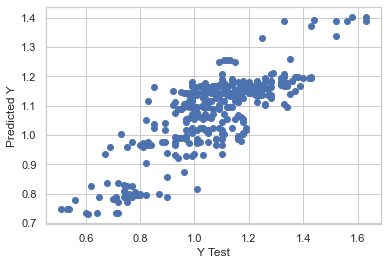

In [232]:
#scatterplot of the real test values versus the predicted values

plt.scatter(y_test,predictions)

plt.xlabel('Y Test')

plt.ylabel('Predicted Y')

#### We can observe that when we plot the predicted values with the actual values we get a graph that looks some what linear in nature

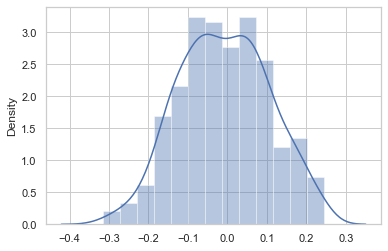

In [233]:
sns.distplot((y_test-predictions));

### Ploting a histogram of the residuals to make sure it looks normally distributed

## Comparing Predicted values with Actual values

In [234]:
# Comparing predicted value vs actual value

print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1.08665116 1.07      ]
 [0.787      0.77      ]
 [1.0221822  1.14      ]
 [1.1035368  1.09      ]
 [0.91960159 0.94      ]
 [0.93408284 1.        ]
 [1.17898352 1.26      ]
 [1.13587007 1.01      ]
 [1.16144366 1.27      ]
 [1.05279793 1.12      ]
 [1.0221822  0.99      ]
 [1.16673077 1.12      ]
 [1.18496    1.36      ]
 [1.38961798 1.56      ]
 [1.04081633 0.89      ]
 [1.15415385 1.15      ]
 [1.17645349 1.34      ]
 [1.15460784 1.18      ]
 [1.16144366 1.25      ]
 [1.15702128 1.16      ]
 [0.82614035 0.75      ]
 [1.38961798 1.33      ]
 [0.99597403 0.97      ]
 [1.17004098 1.14      ]
 [1.1465493  1.05      ]
 [0.93648515 1.1       ]
 [1.19493852 1.4       ]
 [0.966625   0.8       ]
 [1.0221822  1.09      ]
 [1.14158602 1.1       ]
 [1.095      0.96      ]
 [0.79363636 0.82      ]
 [1.02462406 1.19      ]
 [1.15093385 1.22      ]
 [0.97692568 1.02      ]
 [1.13301587 1.23      ]
 [1.14039216 1.22      ]
 [1.15702128 1.06      ]
 [1.11486486 1.15      ]
 [1.16581699 1.21      ]


#### We can observe that most of the predictions are close to the actual values